In [21]:
import splitfolders
folder='dataset'
splitfolders.ratio(folder,output='dataset',seed=42,ratio=(.6,.4))


In [73]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow_addons as tfa
#Getting input for model
inputs= tf.keras.Input(shape=(3,))

# Add new classification layers on top of the pre-trained model
model = tf.keras.Sequential(
    [
        
        layers.Dense(64, activation="relu", name="layer1"),
        
        layers.Conv2D(64,(3,3),activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Conv2D(32,(4,4),padding="same",activation='relu',input_shape=(None,150,150,3)),
        
        layers.Dropout(0.2),
        
        layers.Dense(32,activation='relu'),
        layers.Flatten(),
        layers.Dense(4, activation='softmax')
        #we have 4 output categories and corresponding activation function is used
    ]
)


# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',
              keras.metrics.Precision(),
              keras.metrics.AUC(),
              keras.metrics.SensitivityAtSpecificity(0.5),
              tfa.metrics.CohenKappa(num_classes=4, sparse_labels=False),
              tfa.metrics.F1Score(num_classes=4, threshold=0.5)])

model.build(input_shape=(None,150,150,3)) # `input_shape` is the shape of the input data
                         # e.g. input_shape = (None, 32, 32, 3)

model.summary()


Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 150, 150, 64)      256       
                                                                 
 conv2d_14 (Conv2D)          (None, 148, 148, 64)      36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 74, 74, 32)        32800     
                                                                 
 dropout_38 (Dropout)        (None, 74, 74, 32)        0         
                                                                 
 dense_72 (Dense)            (None, 74, 74, 32)        1056      
                                                     

In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the data

train_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')



validation_generator = validation_datagen.flow_from_directory(
        'dataset/test',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')


Found 2465 images belonging to 4 classes.
Found 1648 images belonging to 4 classes.


[[1.500e+01 1.551e+01 9.745e+01 ... 1.379e-01 2.954e-01 8.362e-02]
 [1.049e+01 1.929e+01 6.741e+01 ... 3.203e-02 2.826e-01 7.552e-02]
 [1.065e+01 2.522e+01 6.801e+01 ... 6.136e-02 3.409e-01 8.147e-02]
 ...
 [1.141e+01 1.082e+01 7.334e+01 ... 8.958e-02 3.016e-01 8.523e-02]
 [1.403e+01 2.125e+01 8.979e+01 ... 7.963e-02 2.226e-01 7.617e-02]
 [1.919e+01 1.594e+01 1.263e+02 ... 1.777e-01 2.443e-01 6.251e-02]]


In [77]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

history = model.fit(train_generator,
      steps_per_epoch=77,
      epochs=10,
      callbacks=[callback],
      validation_data=validation_generator,
      validation_steps=50)


Epoch 1/10
77/77 [==============================] - 223s 3s/step - loss: 0.4139 - accuracy: 0.8335 - precision_4: 0.8548 - auc_3: 0.9684 - sensitivity_at_specificity_1: 0.9988 - cohen_kappa: 0.7773 - f1_score: 0.8243 - val_loss: 0.5800 - val_accuracy: 0.7631 - val_precision_4: 0.7902 - val_auc_3: 0.9444 - val_sensitivity_at_specificity_1: 0.9962 - val_cohen_kappa: 0.6841 - val_f1_score: 0.7416
Epoch 2/10
77/77 [==============================] - 221s 3s/step - loss: 0.3926 - accuracy: 0.8426 - precision_4: 0.8643 - auc_3: 0.9718 - sensitivity_at_specificity_1: 0.9979 - cohen_kappa: 0.7895 - f1_score: 0.8367 - val_loss: 0.5362 - val_accuracy: 0.7900 - val_precision_4: 0.7977 - val_auc_3: 0.9537 - val_sensitivity_at_specificity_1: 0.9969 - val_cohen_kappa: 0.7185 - val_f1_score: 0.7715
Epoch 3/10
77/77 [==============================] - 196s 3s/step - loss: 0.3695 - accuracy: 0.8557 - precision_4: 0.8696 - auc_3: 0.9750 - sensitivity_at_specificity_1: 0.9975 - cohen_kappa: 0.8070 - f1_sco

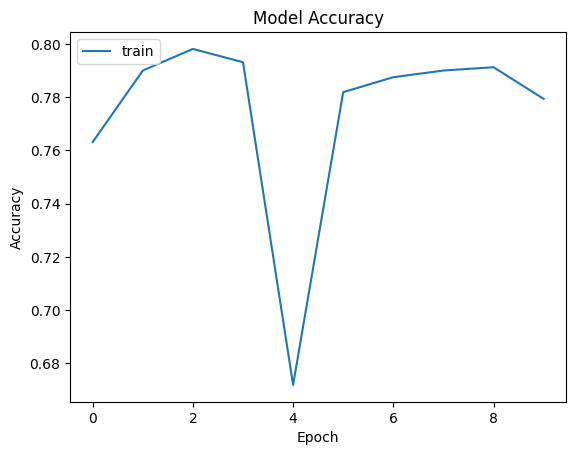

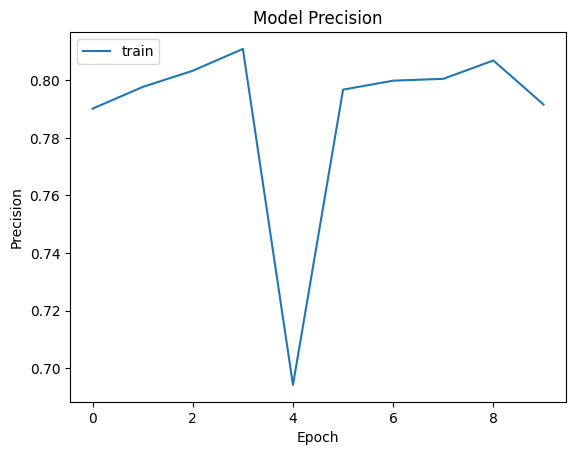

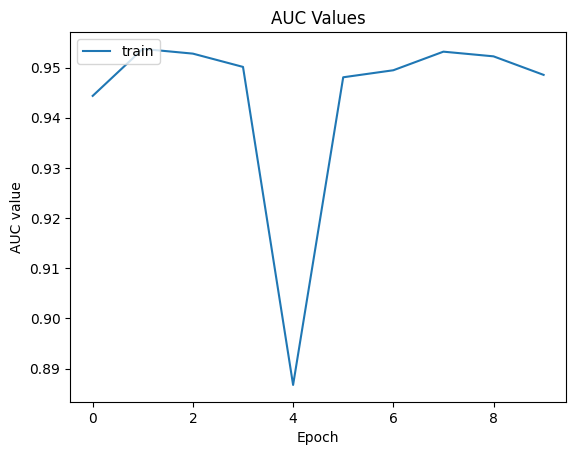

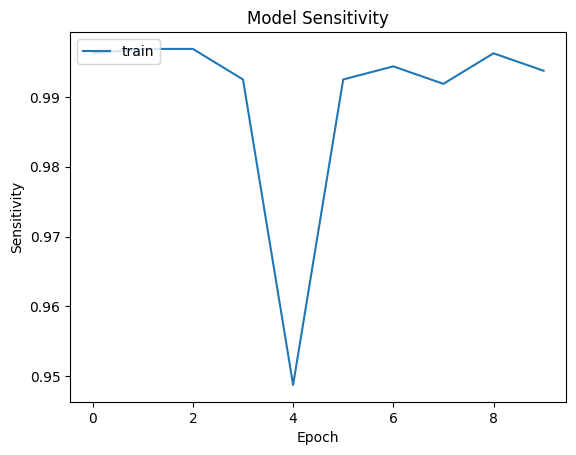

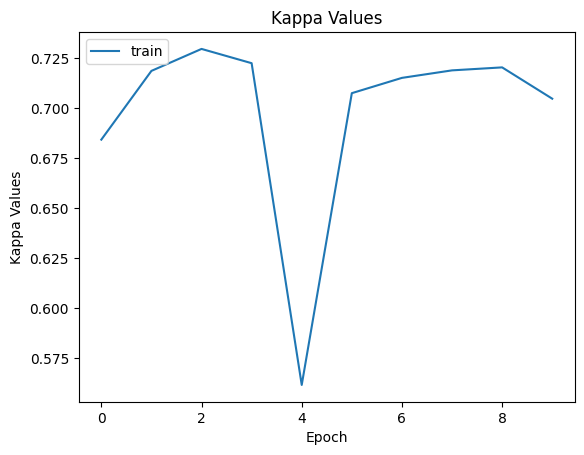

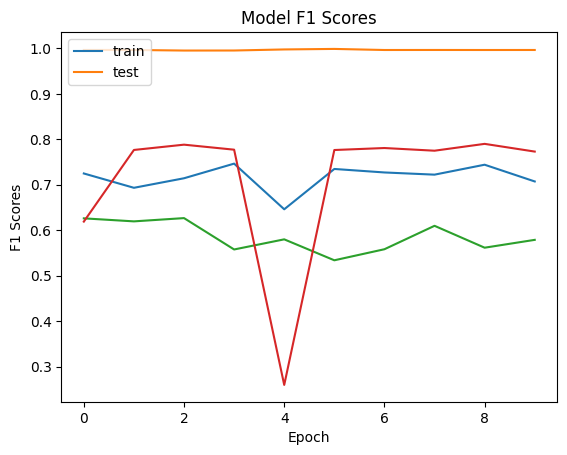

In [82]:
import matplotlib.pyplot as plt
#plotting accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#plotting precision
plt.plot(history.history['val_precision_4'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#plotting AUC
plt.plot(history.history['val_auc_3'])
plt.title('AUC Values')
plt.ylabel('AUC value')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#plotting Sensitivity
plt.plot(history.history['val_sensitivity_at_specificity_1'])
plt.title('Model Sensitivity')
plt.ylabel('Sensitivity')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#plotting Kappa values
plt.plot(history.history['val_cohen_kappa'])
plt.title('Kappa Values')
plt.ylabel('Kappa Values')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#plotting F1 Score
plt.plot(history.history['val_f1_score'])
plt.title('Model F1 Scores')
plt.ylabel('F1 Scores')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()